## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load Dataset

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

In [3]:
df.dropna(axis=1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
#Removing null values
df.dropna(inplace=True)

In [5]:
df.shape

(50000, 2)

In [6]:
df.size

100000

In [7]:
#Function to remove all unwanted characters in our data
def clean(text):
    text = re.sub(r'http://S+|https://S+',' ',text)
    text = re.sub("[^a-zA-Z]+"," ",text)
    text = re.sub(" s "," ",text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"rt ", "", text)
    text = text.lower()
    text = text.lstrip().rstrip()
    return text

In [8]:
cleaned_df = [clean(text) for text in df["review"]]

In [9]:
print(cleaned_df[1:100])

['a wonderful little production br br the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell murals decorating every surface are terribly well done', 'i thought this was a wonderful way to sp

## Tokenisation

In [10]:
x = [nltk.word_tokenize(w) for w in cleaned_df]

## Lemmatization

In [11]:
lemma = WordNetLemmatizer()
lemmatized = [[lemma.lemmatize(w) for w in text] for text in x]

## Removal of Stopwords

In [12]:
without_stopwords = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized]

## Vectorization

In [13]:
vectorizer = CountVectorizer(max_features=20000,analyzer='word',stop_words = 'english')
X = vectorizer.fit_transform([' '.join(text) for text in without_stopwords]).toarray()

MemoryError: Unable to allocate 7.45 GiB for an array with shape (50000, 20000) and data type int64

In [ ]:
X

## Data Summarization

In [ ]:
df.describe()

In [ ]:
df['sentiment'].value_counts()

In [ ]:
df.info()

In [ ]:
print(df.isnull().sum())

## Data Visualization

In [ ]:
sns.countplot(x='sentiment',data = df)
plt.show()

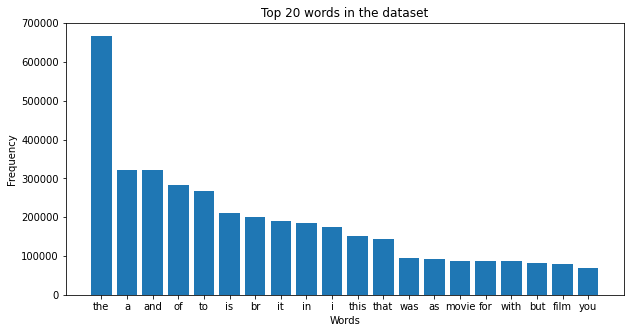

In [14]:
def top_words(cleaned_df):
    # create a dictionary to store the words and their frequency
    word_dict = {}
    for text in cleaned_df:
        for word in text.split():
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    # sort the dictionary by values
    sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    # get the top 20 words
    top_words = sorted_dict[:20]
    # get the top 20 words and their frequency
    top_words, top_freq = zip(*top_words)
    # plot the top 20 words and their frequency
    plt.figure(figsize=(10, 5))
    plt.bar(top_words, top_freq)
    plt.title('Top 20 words in the dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

top_words(cleaned_df)

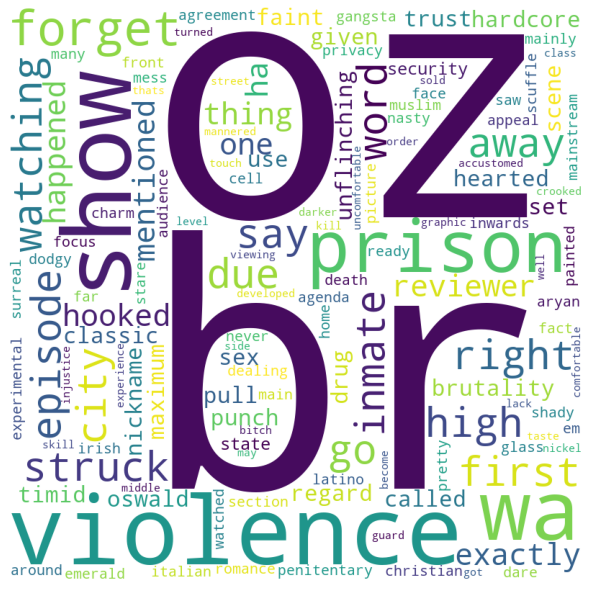

In [15]:
w = [' '.join(text) for text in without_stopwords]
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(w[0])
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

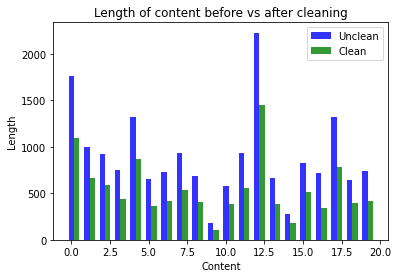

In [16]:
unclean = [len(x) for x in df["review"]]
clean = [len(y) for y in w]

n_groups = 20
a = unclean[:20]
b = clean[:20]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, a, bar_width,
                    alpha=opacity,  
                    color='b',
                    label='Unclean')

rects2 = plt.bar(index + bar_width, b, bar_width, 
                    alpha=opacity,  
                    color='g',  
                    label='Clean')

plt.xlabel('Content')
plt.ylabel('Length')
plt.title('Length of content before vs after cleaning')
plt.legend()

In [17]:
# save list to csv file
def save_list(without_stopwords, cleaneddataset1):
    # convert list to dataframe
    df = pd.DataFrame(without_stopwords)
    # save to csv file
    df.to_csv(cleaneddataset1, index= False)

In [18]:
save_list(w, 'cleaneddataset1.csv')